This notebook defines the procedures to run to perform online clustering

In [1]:
import os
import pathlib

from Data.Datasets.SimpleMonoclassDataset import SimpleMonoclassDataset
from Data.SampleProcessors.BaseSampleProcessor import BaseSampleProcessor
from Models.FeatureExtraction.EmbeddingNet import EmbeddingNet
from Utilities.Confs.Configs import Configs
import  datetime as dt
from torch.utils.data import DataLoader
from Utilities.Plots.data_generation import compute_embeddings_raw

In [2]:
# Load configs
title = "clustering-pipeline"
configs = Configs("config.yaml", title)

Configs:
Debug root folder: /path/to/visual-pdf-classifier/Debug/clustering-pipeline/1673613702.162688
{
    "global": {
        "clustering": {
            "weights": "../Weights/1channel128model.ckpt"
        },
        "debug": {
            "path": "./Debug/"
        },
        "providers": {
            "contagio": {
                "benign_folder": "clean_all_files",
                "malicious_folder": "malware_pdf_all_files",
                "path": "/path/to/storage/"
            },
            "handmade": {
                "benign_categories": [],
                "malicious_categories": [
                    "chrome",
                    "wkhtmltopdf"
                ],
                "path": "/path/to/#"
            },
            "phishing": {
                "file_storage": "/path/to/storage/",
                "postgres": {
                    "database": "pipeline",
                    "host": "127.0.0.1",
                    "password": "password",
                    "p

In [3]:
from Data.Datalake.Phishing.Phishing import prepare_phishing_datalake, file_hash_decode

# Load the Phishing datalake management class
phishing_dataset = prepare_phishing_datalake(configs)

Processing 2023-01-12
Found 6716 samples to extract the embeddings from
Using model: Weights/new/128_3.ckpt


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 840/840 [01:54<00:00,  7.36it/s]


Using eps=0.23
Found 12073 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [108, 109, 49, 113, 20, 89]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 8, 9, 77, 82, 83, 114, 115, 119, 23, 24, 94, 124, 30]
eba9740a51ca7540da0f64fbe1a44c49230596c64375e04d6945b92a6b5f18d1
27495362a83732ee2b87de49ba9593f5696907c79741f7cc0cb94ad1e583efb8
dfde81eed4a841eaa28b81dd3b0f02341178c4ff23812101f2a0b26e08985aa9
251cb7cf8ff3c5a557487d99b87b2e52806de1762987795518e8c87b77822cea
a13e6abe0bbd4a2a7db42b1c8ce12b55407c3e84ba7f28446220293394ec0b56
f54a0e5a2336d114c14b83a4f99790b55c181144a10008eac25d81bd21a151d0
e995091a4b20a86a5360030b8debb131f6c31a3ffb5445d570b75a3696525403
6a23d947d2f5ba83f023da5a03131e3b7bcabd8eab9d8ccb2ac8dbbeaaadb53c
08cbe597588e553c99906ced82fa1d3446b088c4f570e2fd347f8ce018c60f30
23682b1a75f54184cde3e30a5099c1b8da1da3d0aa432

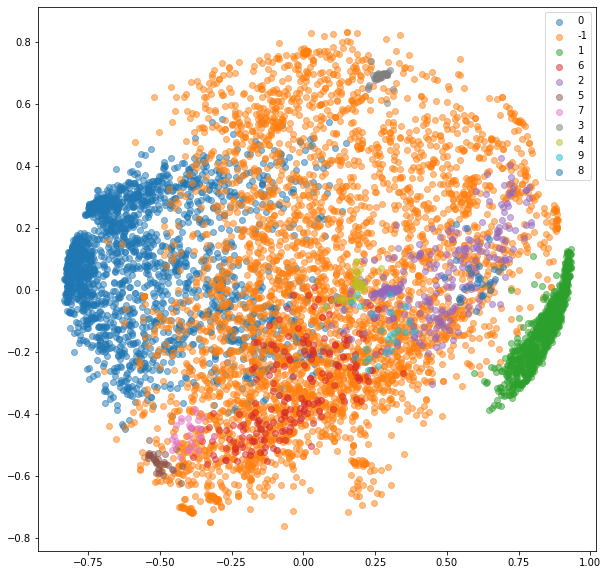

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [109, 78, 113, 20, 89]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 8, 9, 77, 82, 83, 114, 115, 119, 23, 24, 94, 124, 30]
eba9740a51ca7540da0f64fbe1a44c49230596c64375e04d6945b92a6b5f18d1
27495362a83732ee2b87de49ba9593f5696907c79741f7cc0cb94ad1e583efb8
dfde81eed4a841eaa28b81dd3b0f02341178c4ff23812101f2a0b26e08985aa9
251cb7cf8ff3c5a557487d99b87b2e52806de1762987795518e8c87b77822cea
a13e6abe0bbd4a2a7db42b1c8ce12b55407c3e84ba7f28446220293394ec0b56
f54a0e5a2336d114c14b83a4f99790b55c181144a10008eac25d81bd21a151d0
e995091a4b20a86a5360030b8debb131f6c31a3ffb5445d570b75a3696525403
6a23d947d2f5ba83f023da5a03131e3b7bcabd8eab9d8ccb2ac8dbbeaaadb53c
08cbe597588e553c99906ced82fa1d3446b088c4f570e2fd347f8ce018c60f30
23682b1a75f54184cde3e30a5099c1b8da1da3d0aa432e6d21fe93b222d9671e
e724d5e686247b62dc182e66c374233dfae99c57fb2308905a0ed8a90389f1ca
c65156fed182d80394529ecc5039ab27ab84c7f

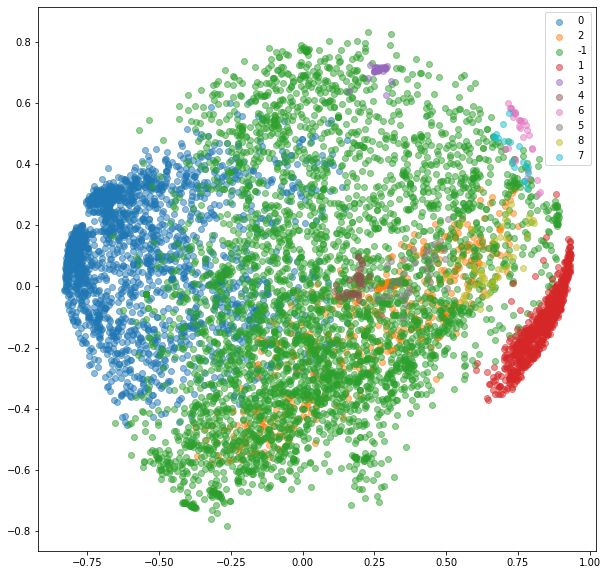

Batch:10000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 23, 124, 94]
eba9740a51ca7540da0f64fbe1a44c49230596c64375e04d6945b92a6b5f18d1
27495362a83732ee2b87de49ba9593f5696907c79741f7cc0cb94ad1e583efb8
dfde81eed4a841eaa28b81dd3b0f02341178c4ff23812101f2a0b26e08985aa9
251cb7cf8ff3c5a557487d99b87b2e52806de1762987795518e8c87b77822cea
a13e6abe0bbd4a2a7db42b1c8ce12b55407c3e84ba7f28446220293394ec0b56
f54a0e5a2336d114c14b83a4f99790b55c181144a10008eac25d81bd21a151d0
e995091a4b20a86a5360030b8debb131f6c31a3ffb5445d570b75a3696525403
6a23d947d2f5ba83f023da5a03131e3b7bcabd8eab9d8ccb2ac8dbbeaaadb53c
08cbe597588e553c99906ced82fa1d3446b088c4f570e2fd347f8ce018c60f30
23682b1a75f54184cde3e30a5099c1b8da1da3d0aa432e6d21fe93b222d9671e
e724d5e686247b62dc182e66c374233dfae99c57fb2308905a0ed8a90389f1ca
c65156fed182d80394529ecc5039ab27ab84c7fa5abe72d033bf3ad6ca199bc1
bf87d710ee7f1b671d9e

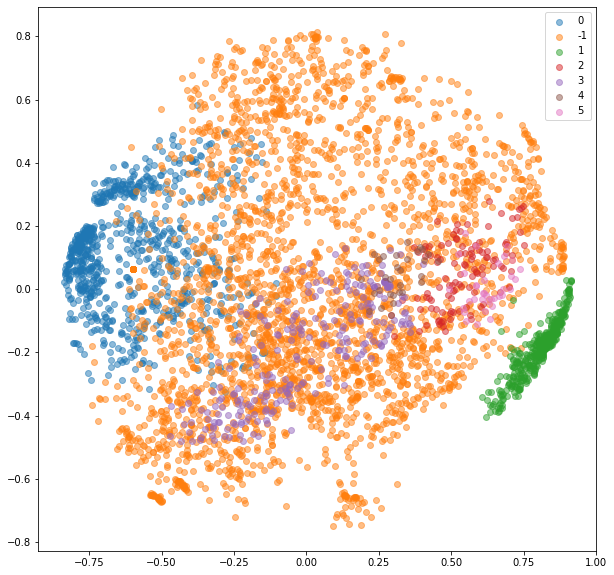

Using eps=0.22
Found 11655 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [108, 89, 20, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 8, 9, 77, 82, 83, 115, 119, 23, 24, 94, 124, 30]
54fae85ea9e498df92c599e31a56638072a13accb028b8ef5e7b213a82d41083
553c08c1f2240fd826bfe7d123902a3e361506af3d516bd283007e99e0372e08
d64d7283465662c1538e1113c74082ebef7f1b7dc38a4a4cbbfc8cf2756c9a66
b62ec543d678e1f0513f56e4cf1a888a926310ba292cba12bf0703e1f6c7672c
79a64475167ed66e8431373d28c2c3d4fa9aef79493ce35507b55a7b58a7a385
fcfbc93d271834feccb8939dc40c57dcaae1ab5a3d774fcd2ef258f66eaa0df7
9be4bd25a330c8695eba360a0d1310449a9bfb4c910fde13734e0af1d6b0a927
ba4775a349e53f2553a53dcbfc96c5d609f76be5cdf179e1aab9847cb0e72249
16ef116b5228986175648521f62591d95014f1ba22ccb6bdae1a6bfd32ef5509
8ca3b2ae1d8b99c6b210d09b3adc15af47b28ada5585f10d6e0d4a448f2

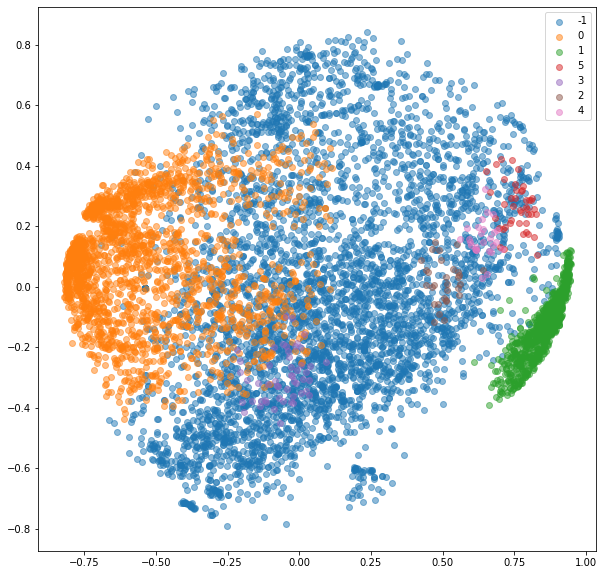

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 9 involved in the conflict: [10, 13, 14]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [89, 20, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 83, 114, 119, 23, 24, 124, 94]
54fae85ea9e498df92c599e31a56638072a13accb028b8ef5e7b213a82d41083
553c08c1f2240fd826bfe7d123902a3e361506af3d516bd283007e99e0372e08
d64d7283465662c1538e1113c74082ebef7f1b7dc38a4a4cbbfc8cf2756c9a66
b62ec543d678e1f0513f56e4cf1a888a926310ba292cba12bf0703e1f6c7672c
79a64475167ed66e8431373d28c2c3d4fa9aef79493ce35507b55a7b58a7a385
fcfbc93d271834feccb8939dc40c57dcaae1ab5a3d774fcd2ef258f66eaa0df7
9be4bd25a330c8695eba360a0d1310449a9bfb4c910fde13734e0af1d6b0a927
ba4775a349e53f2553a53dcbfc96c5d609f76be5cdf179e1aab9847cb0e72249
16ef116b5228986175648521f62591d95014f1ba22ccb6bdae1a6bfd32ef5509
8ca3b2ae1d8b99c6b210d09b3adc15af47b28ada5585f10d6e0d4a448f2c4f09
d

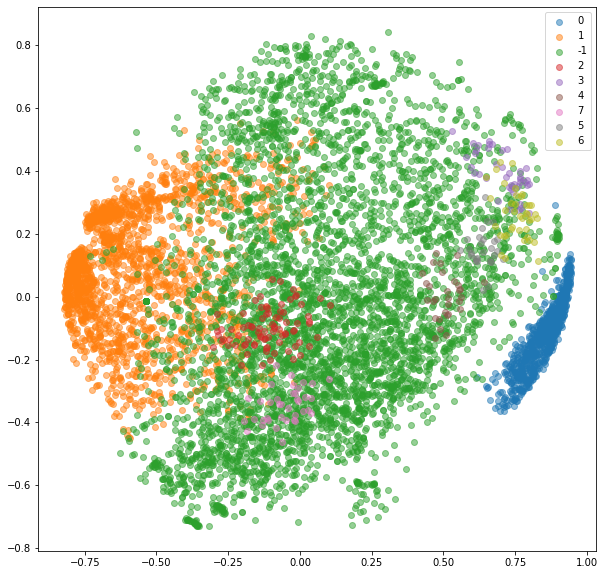

Batch:10000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 119, 23, 124, 94]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 9 involved in the conflict: [10, 13, 14]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [1, 2, 124, 94]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [32, 103, 41, 76, 48, 55, 59]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [33, 49, 81, 52, 58, 60]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [101, 41, 76, 47, 55]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [67, 110, 47, 53, 91]
Conflict resolved!


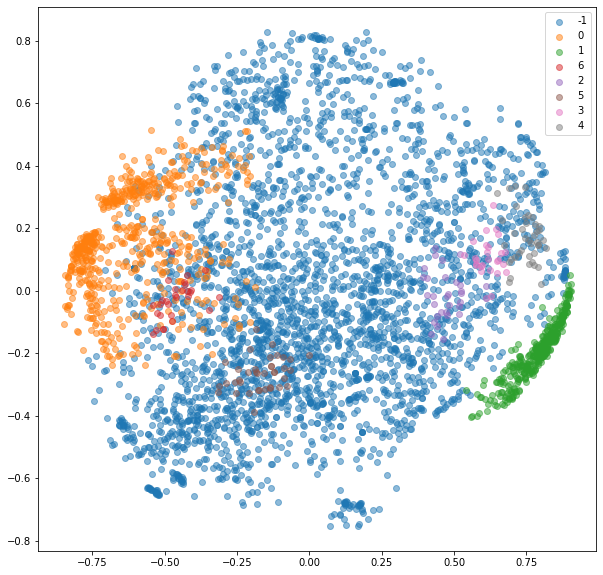

Using eps=0.21000000000000002
Found 9338 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [81, 33, 89, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 83, 114, 115, 119, 23, 94, 124, 30]
5311f3d857d1fedc5181cb54073a8e3043f2b68bb38e8bec27ba10dfd8806d91
f68dd88ddbd156b8b31b676256e98fd432fb965aa0bca3141d92406bc2cdf23a
362dc7f7c721c7d3e7fcf16726bcf37d80a5c657469107706d557e4910062d9a
7c6b74d7aecb8ff803046c7f582d462420f02b82024ea1670341d19bee82e793
15496d71852e8ce29472037e3a5b42b3498a79f3043699acc6ff8aaf88637d4d
acc8c95e5bb4f2a03fa2fdfe348202b16f3edc8f8ad9cfb620c757feeaea8019
29909a5c8a00151f68a44706fd97988205b3fa5310cc4d4a3815e98288a8d1a8
9f102ce57a650bdb82b924f51f307d4d3e54c51ecfd4f82f84e6c8b1d2880f1c
af673befc3f9b4c28113306207094a1daaa6678143bffc638b55b4b7879d8f7f
69c45ecf78e11a47c308f213a8432aa6c5192576d01c7880

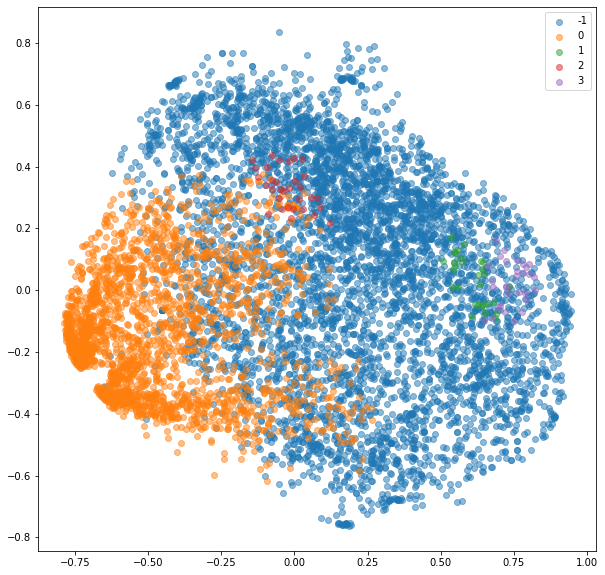

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [33, 81, 113, 89, 58]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 83, 119, 23, 94, 124, 30]
5311f3d857d1fedc5181cb54073a8e3043f2b68bb38e8bec27ba10dfd8806d91
f68dd88ddbd156b8b31b676256e98fd432fb965aa0bca3141d92406bc2cdf23a
362dc7f7c721c7d3e7fcf16726bcf37d80a5c657469107706d557e4910062d9a
7c6b74d7aecb8ff803046c7f582d462420f02b82024ea1670341d19bee82e793
15496d71852e8ce29472037e3a5b42b3498a79f3043699acc6ff8aaf88637d4d
acc8c95e5bb4f2a03fa2fdfe348202b16f3edc8f8ad9cfb620c757feeaea8019
29909a5c8a00151f68a44706fd97988205b3fa5310cc4d4a3815e98288a8d1a8
9f102ce57a650bdb82b924f51f307d4d3e54c51ecfd4f82f84e6c8b1d2880f1c
af673befc3f9b4c28113306207094a1daaa6678143bffc638b55b4b7879d8f7f
69c45ecf78e11a47c308f213a8432aa6c5192576d01c78800723f7d0ccfb90af
e60d1da1bf1aae862f4317b30dbda547dddbac23357f14086cc05c3b8be9392e
1fc2456536d531f3c499c539299832742cc490edc63ecb6f6c4102e06

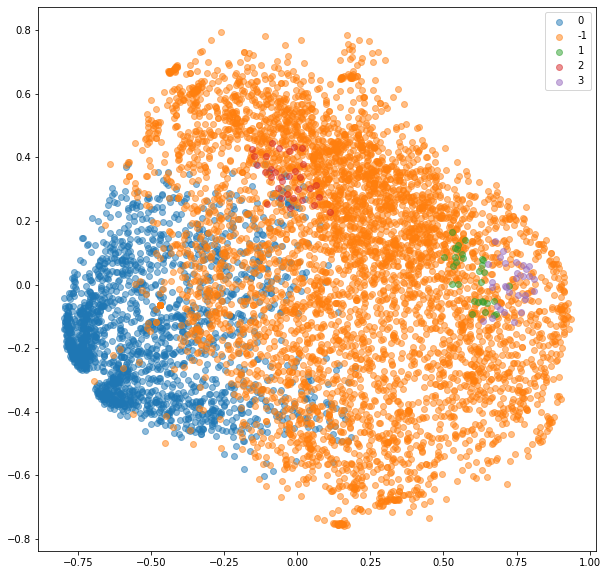

Using eps=0.2
Found 9338 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 83, 114, 115, 23, 24, 124, 94]
3c5b1a8ddf3dc902458bf16e173f0cab1c602242b6afbb4d3cc737abe6ab4034
693b60b4c32ba7206025ae65333ef0f45725f915c50c91e5ddccd789d78f44c3
7c2158a6539f6874d8a23ab7434f4efa5d72870bca852dd567e1b33cd22c7541
715c9113e54a3f68c83870850b58eae4a33c7df028bef39a2291736bf795e6ba
305195166bcbc3d231adff3297361a91a2a0359bbdaec6f6e465d036cbb0f6f6
edb7935a5612c1e3126ab7a55a246794a77bad9fba305b34f332cfd6f10706a3
1204613645a980a36c5d9e84ba067927a1916971945aac5be8131346ea0e6897
df7d54a9b5d72a9a3a447051efed1a007288be499be35ecf8520b560c6e52ea5
5b46c6d0119734f6238b897d880f190371f35443f2e65f0cb7d1ff72df16cecd
357df2dd59e58e2470e0a9566ff0422d9112eca5dff879868a6a12cefb28bf1e
f6125133ae159c16

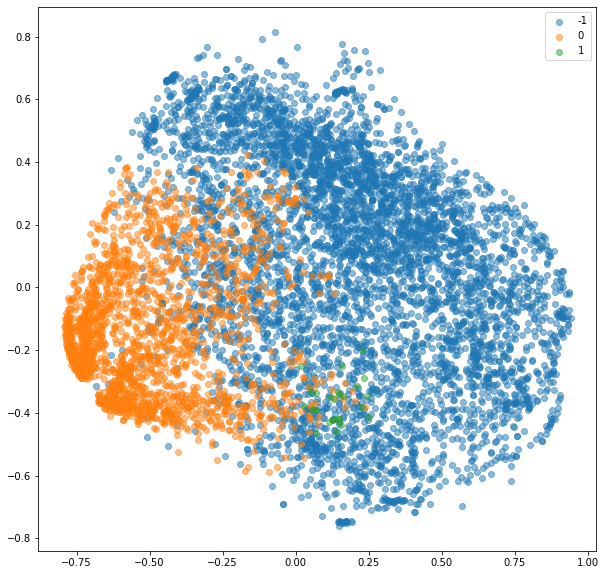

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 83, 119, 23, 24, 124, 94]
3c5b1a8ddf3dc902458bf16e173f0cab1c602242b6afbb4d3cc737abe6ab4034
693b60b4c32ba7206025ae65333ef0f45725f915c50c91e5ddccd789d78f44c3
7c2158a6539f6874d8a23ab7434f4efa5d72870bca852dd567e1b33cd22c7541
715c9113e54a3f68c83870850b58eae4a33c7df028bef39a2291736bf795e6ba
305195166bcbc3d231adff3297361a91a2a0359bbdaec6f6e465d036cbb0f6f6
edb7935a5612c1e3126ab7a55a246794a77bad9fba305b34f332cfd6f10706a3
1204613645a980a36c5d9e84ba067927a1916971945aac5be8131346ea0e6897
df7d54a9b5d72a9a3a447051efed1a007288be499be35ecf8520b560c6e52ea5
5b46c6d0119734f6238b897d880f190371f35443f2e65f0cb7d1ff72df16cecd
357df2dd59e58e2470e0a9566ff0422d9112eca5dff879868a6a12cefb28bf1e
f6125133ae159c16e45ab49285d8f42ae173e38de6186af22a656342db4955b0
cf6ac27ca838b184a44e2aa3002c7b630033268ef4abc133f032c214b6e31798
89a56436

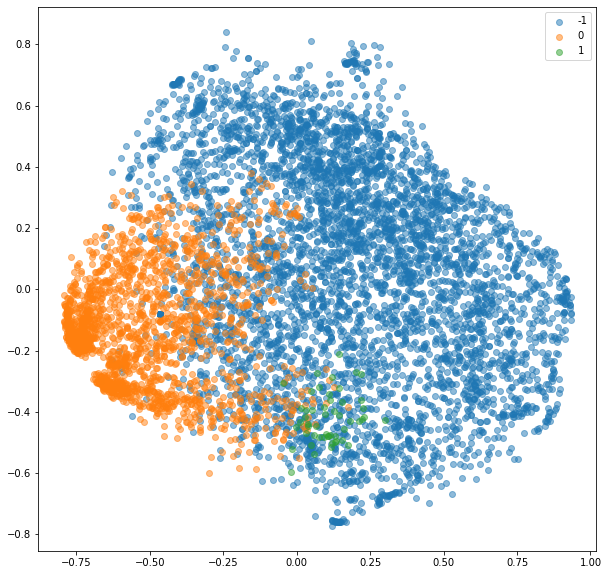

Using eps=0.19
Found 9327 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [89, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 119, 23, 124, 94]
285806e8b7994c6a2d995861f2045e1874cab32c1651702d6cfecc049ba4d753
05796ffd6288fecbac306ef9fa1238f6b73acf78305b674d8a396481ec52b71f
ceb8116a4f9f84e3f6092f4df7b3a05a7087065fbe5055486555ab6c88d6ce7e
3a2287d81a921deab3b3adde155aa4809d312a34d2024523f4d01a9bab508b9e
02e2d0528e543798e293b07951d3d6954e8c9056e54fb55f1715f75d39acb443
17bdf0b2bac464699bec6b56a3c74d22c7d6c5d2bcd8fe43aafa0565144e52cf
288b8c0d4b6482e3456ce1052fe43bf4895c0926ade4aadd5aab6a6b2ec83cc0
63634fbdcf1180e7143ae981b0b6cd77e802950aff8517a0ec04f2d9b1aadaec
2f804e4f0b855f37d474bdd16d335a031f9cfa4eae442d9e61f6d8872774d5af
c6d7ac186b57145637bb1b680a9d26d89f545cbe75f26b68a5ae120a70404a90
7e86aee13ac0eb0712e6b3bb

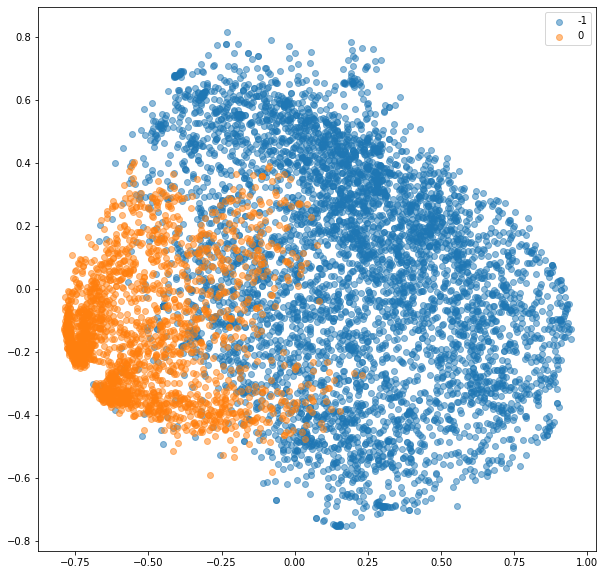

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [89, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 119, 23, 124, 94]
285806e8b7994c6a2d995861f2045e1874cab32c1651702d6cfecc049ba4d753
05796ffd6288fecbac306ef9fa1238f6b73acf78305b674d8a396481ec52b71f
ceb8116a4f9f84e3f6092f4df7b3a05a7087065fbe5055486555ab6c88d6ce7e
3a2287d81a921deab3b3adde155aa4809d312a34d2024523f4d01a9bab508b9e
02e2d0528e543798e293b07951d3d6954e8c9056e54fb55f1715f75d39acb443
17bdf0b2bac464699bec6b56a3c74d22c7d6c5d2bcd8fe43aafa0565144e52cf
288b8c0d4b6482e3456ce1052fe43bf4895c0926ade4aadd5aab6a6b2ec83cc0
63634fbdcf1180e7143ae981b0b6cd77e802950aff8517a0ec04f2d9b1aadaec
2f804e4f0b855f37d474bdd16d335a031f9cfa4eae442d9e61f6d8872774d5af
c6d7ac186b57145637bb1b680a9d26d89f545cbe75f26b68a5ae120a70404a90
7e86aee13ac0eb0712e6b3bb78040ba26e71ac740c65b7a00103463a4167e06e
7148f32402ffbb53eeb747bf441e3d8e0f1bfc21799cb6cfb68064b3bd828c0d
b91c63765b30

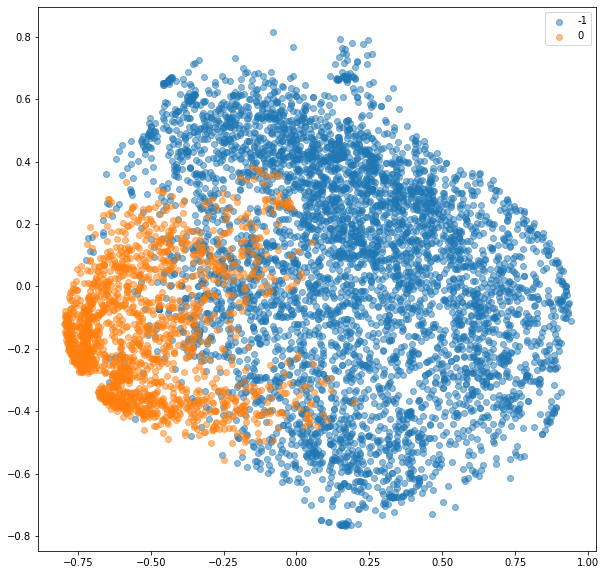

Using eps=0.18
Found 9327 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [89, 90, 113]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 119, 23, 124, 94]
5648b44a8f6c79a8e69d8b4433650c674e59886f55adec8083cec38d72c458ba
2f643c2f567a6f221953481892066d15d0edcfaf0f7aeb77db08a339f33253a4
c4698c054e83b6a20aca4b860d10c7ee6c34b680e38203ac77acddf552e42c41
d751d6a1e7eb6914cb4671f2497165964df681e1338c5ff271633b26bd8ae967
dce86b8ff30efe2602638166a61f36891ee02a97058575bf77fd1f2bf042d3d4
9dea1bedf79a78f0731a42834226fab502f37e43d42defec68b2041501a4284a
e27c67ffc32f5f070b8647f0c04ed21fd7a23d5adec16963e7ef7c90a6fcdfe5
872c0f74f155e77e3e4362f0d61c65caab92fd97427b0c319066e8cad7248a2a
16faf1024ab601898a903efbcf2170340ef44393de7d20cbcfdb270c5db55354
adb7c2489027969f8074f65dcb3e0f70ebc60e380cf149a559ea3fad07552c0b
8e368d2145daf6366443

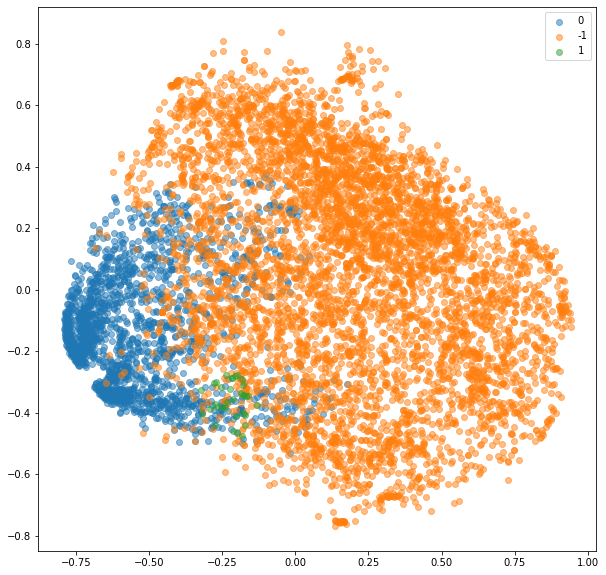

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 9, 77, 82, 119, 23, 124, 94]
Conflict resolved!


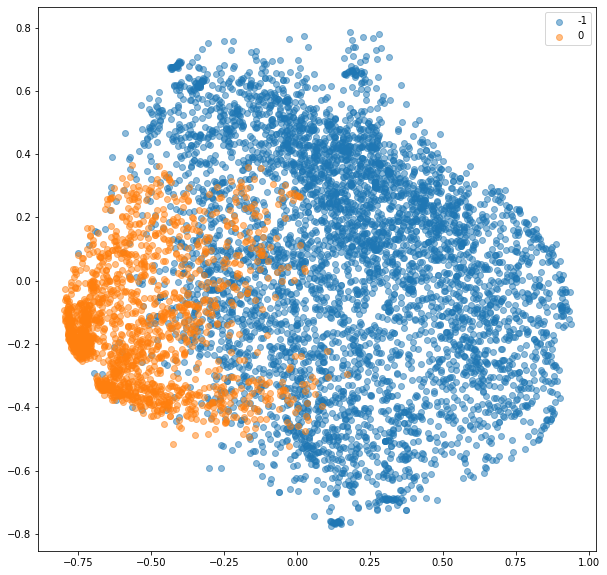

Using eps=0.17
Found 7754 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 3, 6, 77, 82, 23, 124, 94]
Conflict resolved!


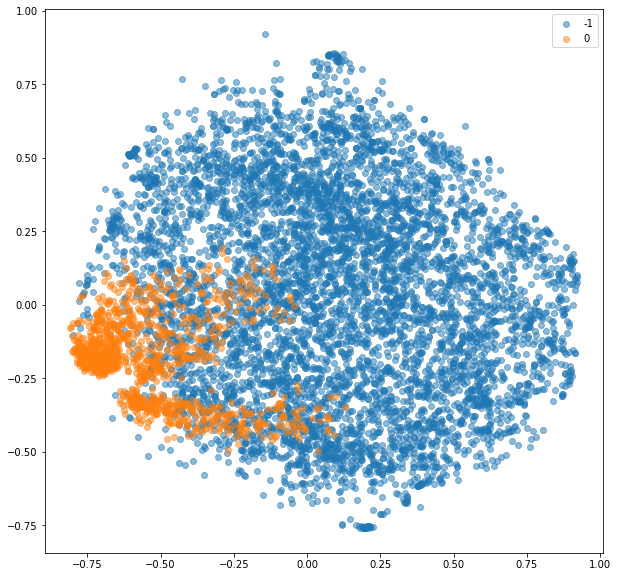

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [0, 1, 77, 23]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [77, 23]
Conflict resolved!


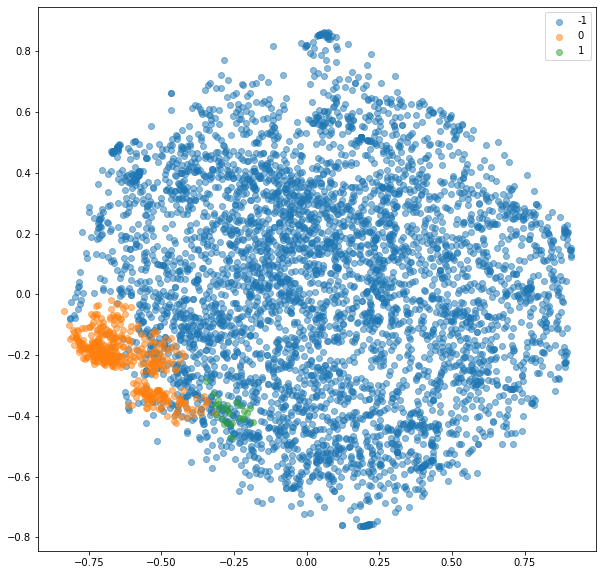

Eps: 0.17 resulted in a perfect clustering! No need to process the samples further
Processing 2023-01-13
Found 0 samples to extract the embeddings from
Using model: Weights/new/128_3.ckpt


0it [00:00, ?it/s]


Using eps=0.23
Found 6307 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [106, 108, 109, 113, 89]
Clusters of campaign 6 involved in the conflict: [0, 1, 2, 6, 8, 77, 82, 83, 115, 23, 94, 124, 30]
344545b77ab3f60729248addfb14c4a8707e7ea9d73fbb8530008be4d5d71ca7
bcc695de39d8a77bcfb78d6746491da280fe29c0595e6ee8bc213f66085bf9ca
f7dd0b12da1bf38f1983a6fe776d5736a130cd798108b4c4ab5e8d2e6f1e2a65
3cfdf3da0fc7f324dae84592bdd6bc783d332fd946227a6844d05ddaac9935b7
d3d0d9b227fc9f56c8308a3d040ab13ee82fe74a83f5855b75e7b37c8ff85b4b
93060c0a3292aaf157191c89b5ca49aafec559b5a4aaa4ec6c0fd63fdc160033
275d5c66b436eb441d0b0334d290e5d4cb4d46433163914df360f4c1b15c1365
8cf7c9e780abfa0e6699922219eb43f73e0fa2f6bbc437689d102637689f8edf
5ffa2bcae84aee5cd2bf5fff7d77f08753cba4f4ac22b37acb5a0329cc87b498
7f86858c06c326578344bf3a2ac31093776198c4add0e2c0eddecba89fcb026a
1997

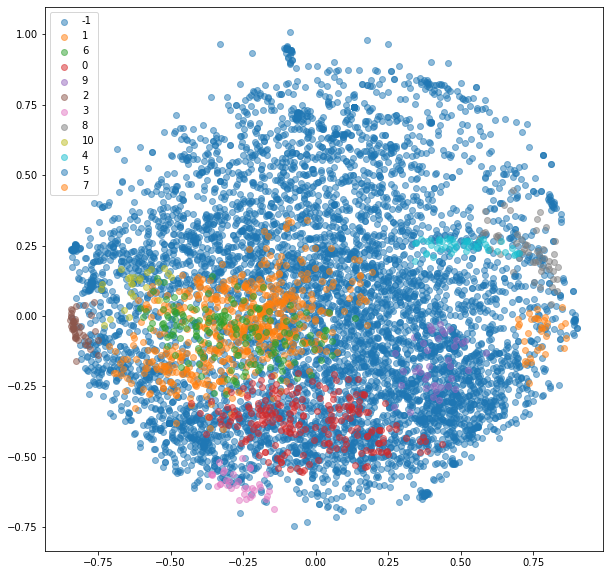

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [96, 34, 92, 55]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 9 involved in the conflict: [10, 13, 14]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [32, 101, 41, 76, 47, 48, 79, 116, 55, 59]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [33, 42, 48, 49, 52, 54, 58, 60, 81, 86, 87, 89, 90, 93, 103, 107, 108, 113, 118]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [67, 110, 47, 53, 91]
Conflict resolved!


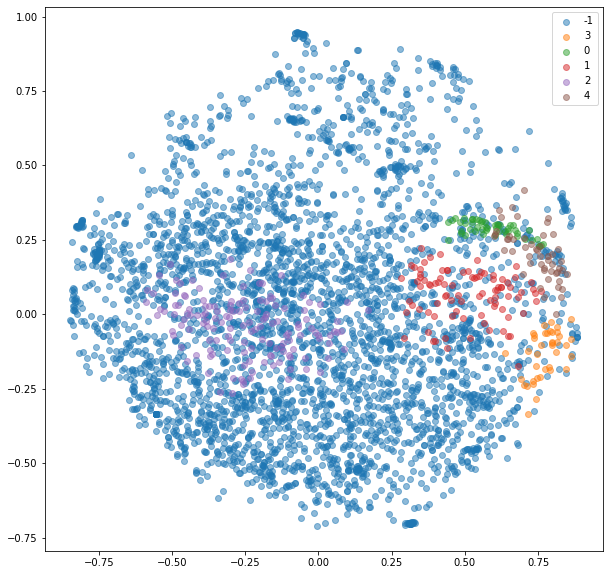

Using eps=0.22
Found 6133 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [113, 90, 106]
Clusters of campaign 6 involved in the conflict: [1, 2, 23, 124, 94]
703faa84086b1b75db15788164fe036efa6d4c2406a7a1765aab7aded1952fe0
f2af5bbdcb1817e3f8e8d43a20fcc5286865d6aa2e1ca7f137338575b76f23f8
cb85a29e7de36af97f2aceea6c50c701fe6367905be11f32031b57b57995db5f
cb5f2ac30e091eef0553d27cb503258971bd52e2c4d3c0a2a688886f4bea7505
677021fdeadf35f5e468a1acb7c28efabb82aa5da178b4a00a73d3a82324ed26
bbb968a16d9d6d0cf08b43ee9f69e192b51f8b61f33ed1bfb87c4162b57f0e57
652a0ddbf3d85feaf7483a3523a8f1acf6a315c9c6612d9819b011f86b8e906b
6296d1c85bd19b4d7defe6874a00f48a6d1876fe0f4678c8eaf2a1c00a48703c
666d4e4bce4ef33cdc34d26a128fbf6f58af80a57a3188304ed8246f7fa77851
5e064d21544424fce517c25b90e5e38e64189f8e12c49acdad5b359b40b635e3
242aed77c7fa7fcfa73821bcd52a156808672b918494

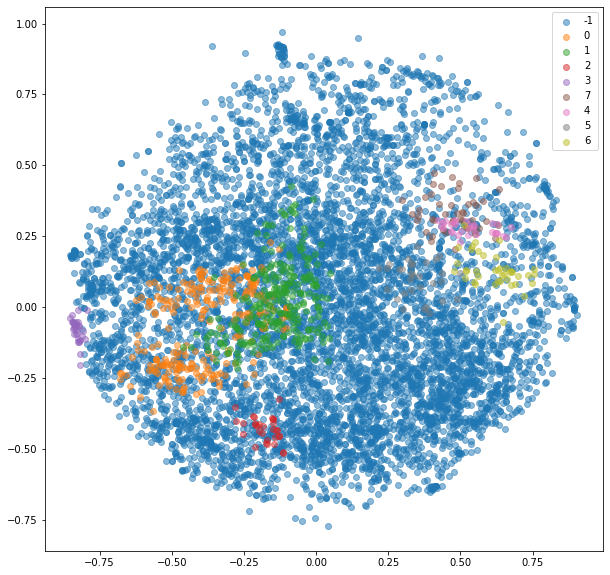

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 9 involved in the conflict: [10, 13, 14]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [32, 76, 79, 48, 55, 59]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [32, 41, 101, 47]
Conflict resolved!
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [67, 102, 76, 53, 95]
Conflict resolved!


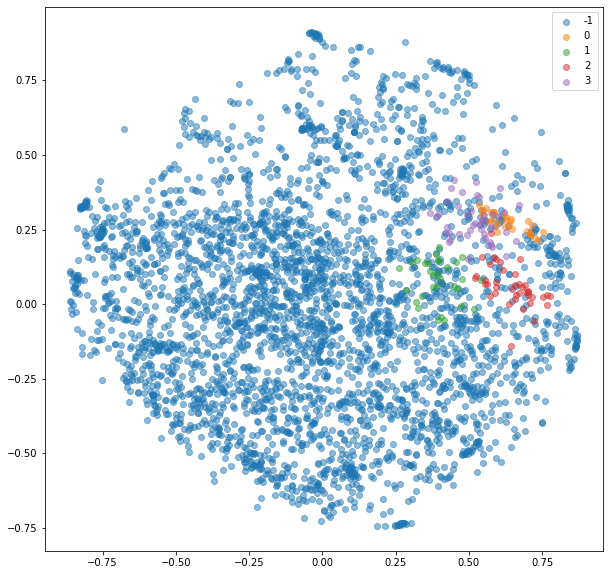

Using eps=0.21000000000000002
Found 5955 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [113]
Clusters of campaign 6 involved in the conflict: [1, 2, 23, 124, 94]
3786bc728a4ee1d7a2f58ce5310fa5c0a13acab7c16c698f21bd37e9bf4b72b7
b3d9d7e2ed465bd3aeb5d59e7a4e9f0454ba874d5006e33812349e5a6291587c
afc195b47a7e35d75ef4586b2e6f35dc8bd4dcbf05c747236d6473b51e273dd3
02c74dc6d2a05f05cdb2bf7f1d4f291556e817e48f6fe2aa39cb48a07eda282c
0bd830f316e1a8a63a7fc446a0aa47f6daa166aa6749c3d26243dbb28eb5ebd8
d3b5c554dccfd553d57166386093067a9077acb43c2ed43262c7f8db563af969
125584d6081cfdeb61b27c7fad08d0eb5379ac513f4399486dccde0fbdc6a41c
56d3523250340126b7cfdf3d5578069f7aec022464a68430aa7fae6b2f486b34
67ad0bf274c51136ba901e63942723ebeefa824c7ccd1221ac0e2e3eaf03f379
60722171987a787c03788d2595ce963a09385bde9955fdfe29515adc945cae30
619c517cc2e44ab1388c001eae496cd73cf3a6

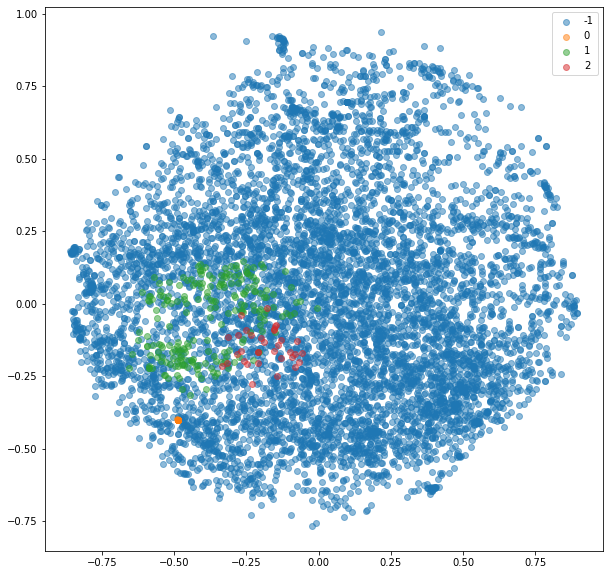

Batch:5000
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [48, 33, 60, 54]
Conflict resolved!


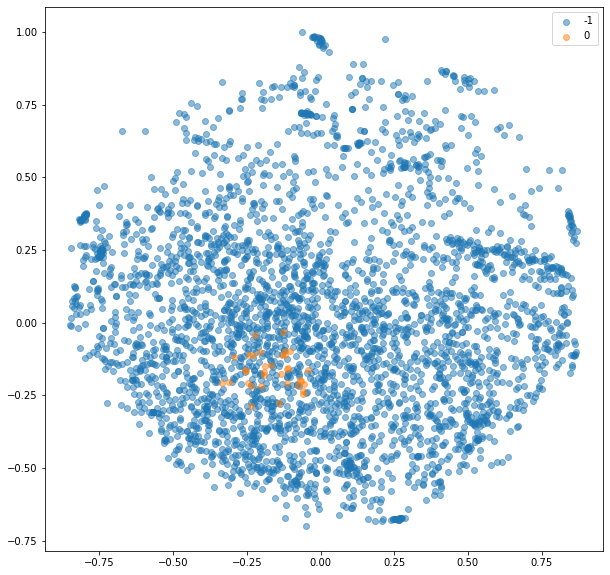

Using eps=0.2
Found 5940 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 20 involved in the conflict: [89, 113]
Clusters of campaign 6 involved in the conflict: [2, 124, 94, 23]
2a76833f7eb331de8d9ebf4cb4286348112a87dbe3ae0054e44cd05d10463c18
e7a77a16f3a729b17282322b9099617f8693efeb16781be008677227cde68c82
f95a48fe0aa60ce9a3b5729aace5442c53139dbf3145c6da09498761f6d83906
f2ade2ad284e6b04d09023a67dc82b1f880cd57f66255f95174a2cc33b4b2616
51273d68bdd81c63ed37fc7d14b8fb1715c289313b463f9b7a69771881b17d0c
fb086afb9edac7fa1ff5b3b3b642f4789334592f1eae0f46b1aec0ce59ec902b
8eb7e2c1a25c52804658e2ac002881a49e924f5bcacf19c49e9c36e03a24d869
efa2e74a8a16406645d373cd4697bfccfbdf8ce9687ccd71642d23c5478fc9aa
ef947c825b2bf161156d6275743aa593a58fc6bfd92f9de1b7ecc82885f1de90
384cedea235709a72d17754a3e67ce439c5874a7aeff7332e07c5928a174bf30
48d1e263edd395d4316fae4a589a7b2522fd5ea7bfa4bd9dfa107

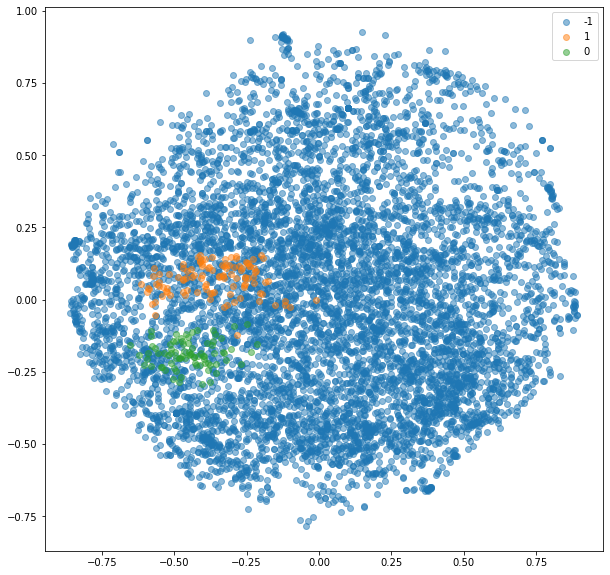

Batch:5000


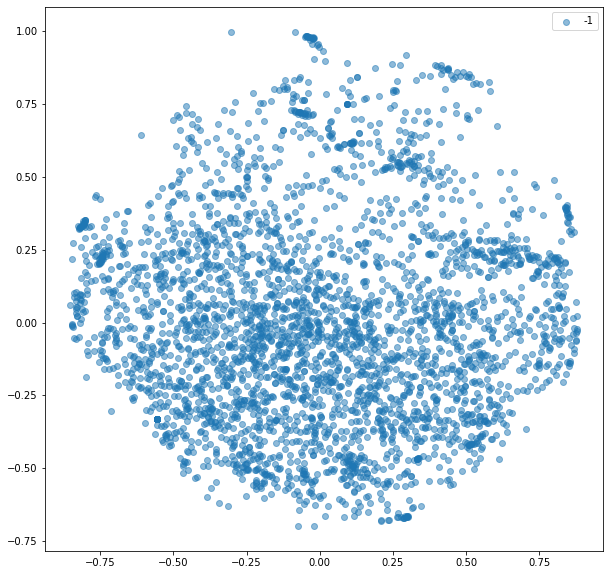

Using eps=0.19
Found 5940 new samples to cluster
The number of samples to cluster is excessive, clustering them by batch
Batch:0
ANALYZING conflict: 

 Anchors in cluster:
Clusters of campaign 6 involved in the conflict: [2, 94]
Conflict resolved!


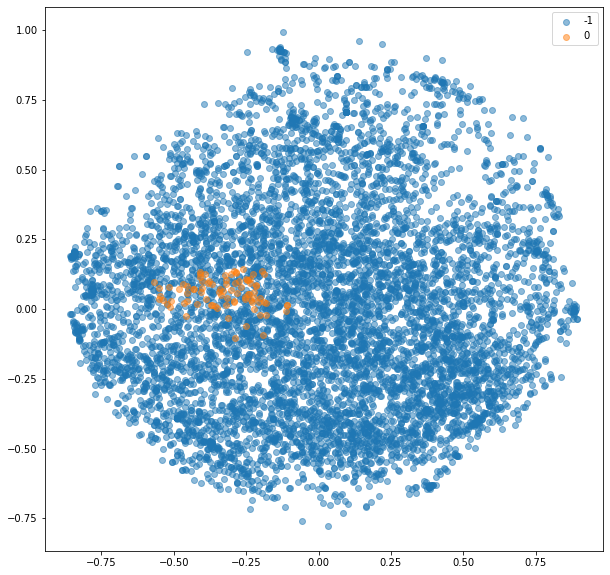

Batch:5000


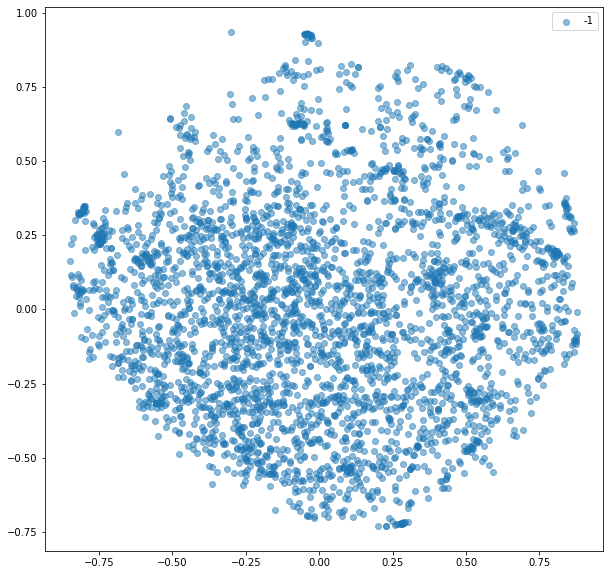

Eps: 0.19 resulted in a perfect clustering! No need to process the samples further


In [10]:
from Clustering.pipeline import identify_seo_documents, prepare_samples_for_clustering, cluster_samples_visually

possible_eps = [0.23 - i * 0.01 for i in range(20)]

base_date = dt.date(2020,12,16)

time_delta = dt.timedelta(days=1)
current_date = dt.date(2023,1,12)
end_date = dt.date(2023,1,14)

i = 0

while current_date <end_date:
    print(f"Processing {current_date}")

    prepare_samples_for_clustering(phishing_dataset,base_date,current_date)

    discovered_new_cluster = cluster_samples_visually(phishing_dataset,base_date,current_date,possible_eps,True)

    if discovered_new_cluster:
        print('A New cluster has been discoveredw')
        break

    current_date += time_delta